# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
# Create a new dataframe from your CSV
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
# Print out any information you need to understand your dataframe
print(df.shape)
print(df.dtypes)
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(23486, 11)
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
['Unnamed: 0' 'Clothing ID' 'Age' 'Rating' 'Recommended IND'
 'Positive Feedback Count']
['Title' 'Review Text' 'Division Name' 'Department Name' 'Class Name']


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

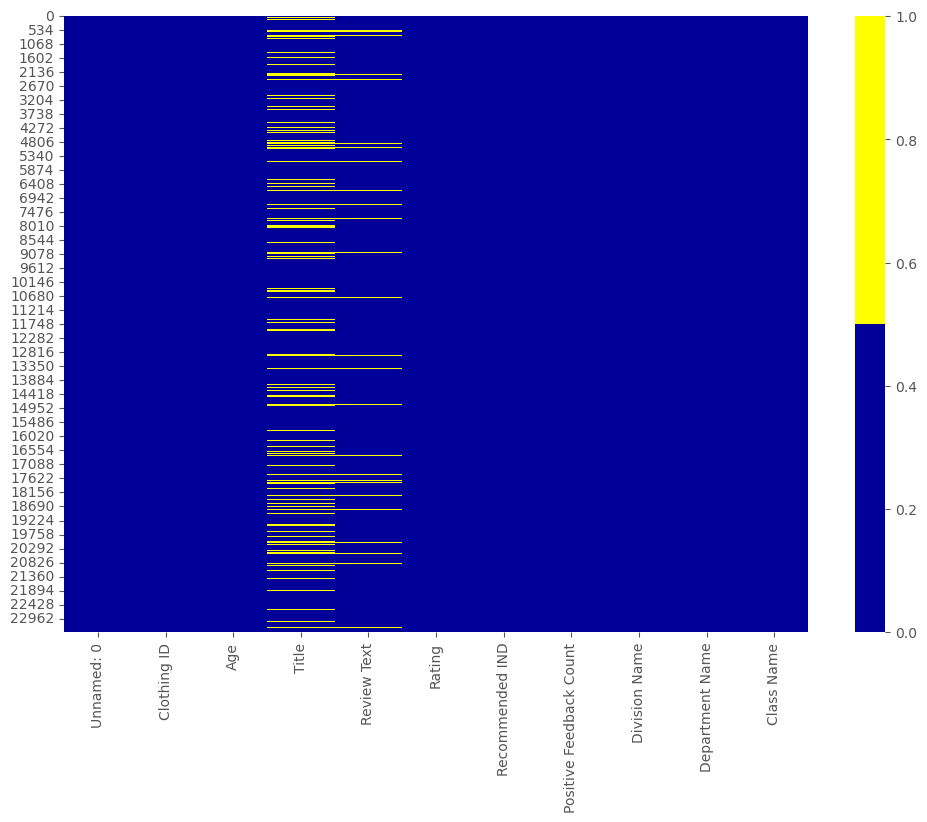

In [4]:
# Plot a heatmap of any missing data
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [5]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

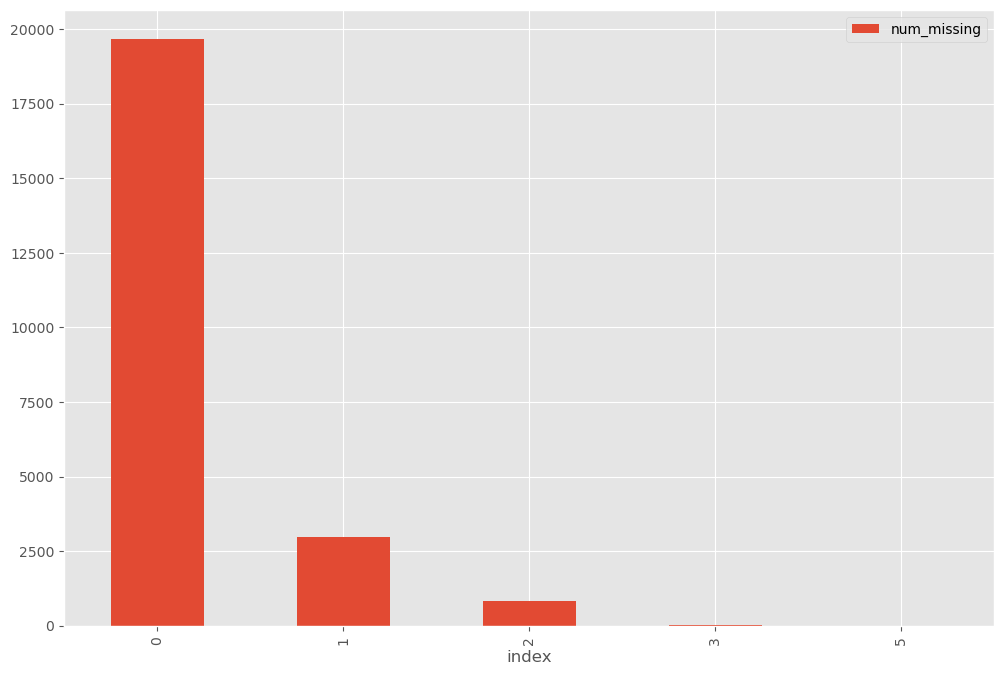

In [6]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [10]:
# Handle any missing data in your dataframe.
df['Title'] = df['Title'].fillna('_MISSING_')
df['Review Text'] = df['Review Text'].fillna('_MISSING_')sasa

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

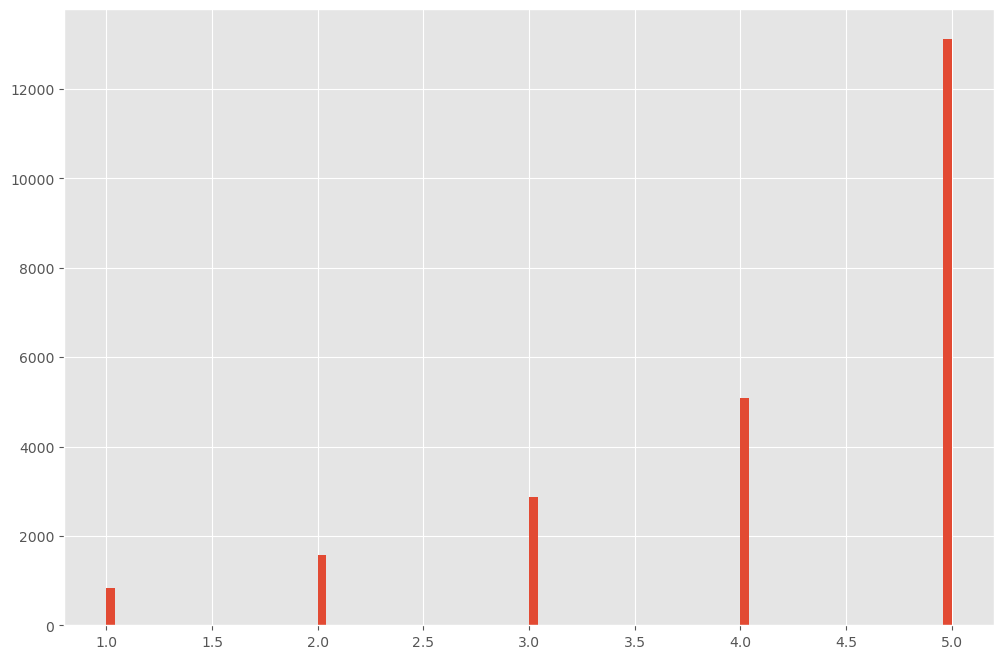

In [13]:
# Plot a histogram to see if there are any outliers.
df['Rating'].hist(bins=100)

In [15]:
# Use the describe() method
df['Rating'].describe()

count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

<AxesSubplot:>

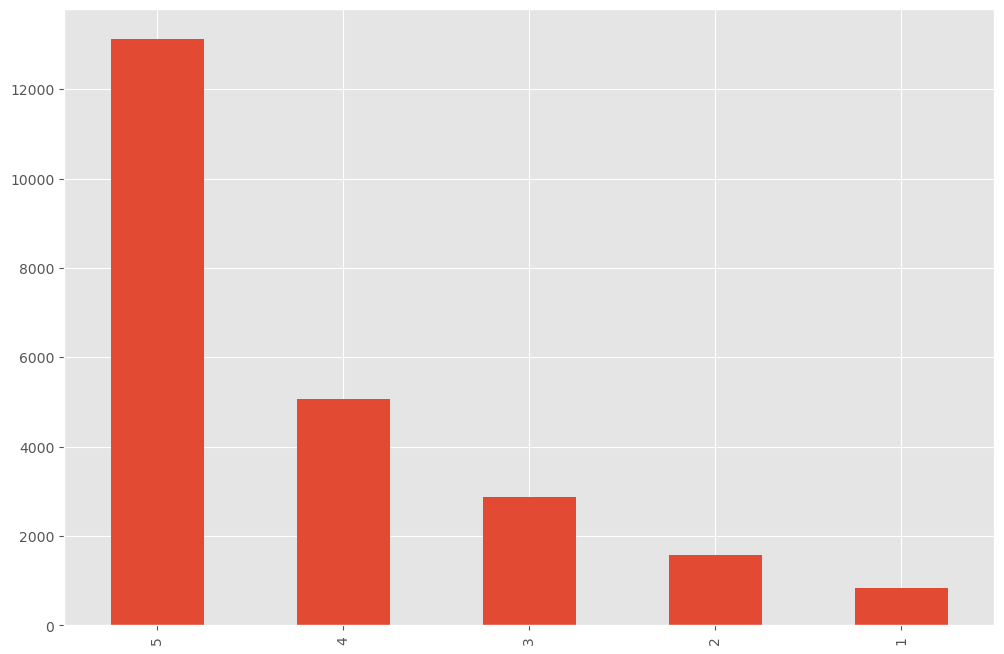

In [16]:
# Plot a bar chart
df['Rating'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [11]:
# Look for any irrelevant data in the dataframe. How will you handle it?
#

In [ ]:
# Look for duplicates. How will you handle any duplicates?

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [17]:
# Try to convert all the strings in a column to lower or upper case. 
df['department_name_lower'] = df['Department Name'].str.lower()
df['department_name_lower'].value_counts(dropna=False)

tops        10468
dresses      6319
bottoms      3799
intimate     1735
jackets      1032
trend         119
NaN            14
Name: department_name_lower, dtype: int64